In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
from math import *
np.random.seed(123)
import urllib.request
import urllib, os

In [2]:
import pandas as pd
import xarray as xr
import math
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
import numpy as np
import xarray as xr
import xesmf as xe

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
ds = xr.open_dataset(r'/home/shubham/ugp/cleaned/Land_and_sea_temp_1850-2022.nc')

In [6]:
ds= ds['temperature'][1826:-2][:][:]

In [18]:
ds

<xarray.DataArray 'temperature' (time: 236, latitude: 180, longitude: 360)>
[15292800 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) datetime64[ns] 2002-04-01 2002-05-01 ... 2021-11-01
Attributes:
    units:          degree C
    standard_name:  surface_temperature_anomaly
    long_name:      Air Surface Temperature Anomaly
    valid_min:      -20.13358547046764
    valid_max:      25.779894588495726

In [19]:
per = pd.DatetimeIndex(ds.time).to_period("M")
per

PeriodIndex(['2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
             '2002-10', '2002-11', '2002-12', '2003-01',
             ...
             '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
             '2021-08', '2021-09', '2021-10', '2021-11'],
            dtype='period[M]', length=236)

In [20]:
(per)

PeriodIndex(['2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
             '2002-10', '2002-11', '2002-12', '2003-01',
             ...
             '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
             '2021-08', '2021-09', '2021-10', '2021-11'],
            dtype='period[M]', length=236)

In [22]:
l = []
for i in range(13):
    l.append(ds[per.month == i])
    

In [23]:
l[1]

<xarray.DataArray 'temperature' (time: 19, latitude: 180, longitude: 360)>
[1231200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) datetime64[ns] 2003-01-01 2004-01-01 ... 2021-01-01
Attributes:
    units:          degree C
    standard_name:  surface_temperature_anomaly
    long_name:      Air Surface Temperature Anomaly
    valid_min:      -20.13358547046764
    valid_max:      25.779894588495726

In [24]:
f = []
for i in range(1, 13):
    k = []
    for j in range(1, len(l[i])):
        k.append(l[i][j][:][:].mean())
    f.append(k)

In [25]:
for i in range(0, len(f)):
    print(np.array(f[i]))

[0.7971407  0.6633491  1.2479525  0.83670694 0.65186054 0.7825081
 1.1066339  0.76028234 0.88701904 1.0633622  0.9335722  0.7521722
 1.095605   1.3666633  1.3769926  1.2622193  1.2754567  1.0916964 ]
[0.5633446  1.1838617  1.1023295  1.1315136  0.3690538  1.0534838
 1.0303632  0.99873644 0.7651359  1.064534   0.99059993 0.90843993
 1.6055828  1.4334592  1.2128768  0.85431933 1.022272   1.2056631 ]
[0.67430806 1.1722116  1.163471   0.9720701  0.5425152  0.57510847
 1.3255372  1.028701   0.9952881  0.33807063 0.92809665 1.0152494
 1.642966   1.5998986  1.5786796  1.3578361  1.337195   0.8265066 ]
[0.6245618  0.54400504 0.9302754  0.8965486  0.8713181  0.7628259
 0.50042534 1.2884618  1.2449394  0.83173627 0.9932276  1.088596
 1.1044593  1.562853   1.6457081  1.1998473  1.6056855  1.1768059
 1.0958195 ]
[0.6235206  0.89392704 0.7096997  0.7030916  1.18502    0.8817028
 0.5442191  1.2056465  0.8308243  0.8829423  0.68484336 0.9681801
 1.0053902  1.216557   1.1817571  1.1875687  1.249075   

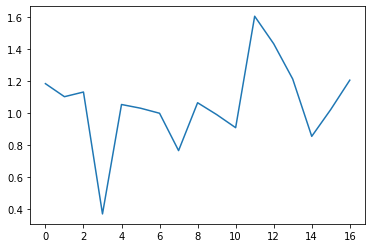

In [26]:
A = np.array(f[1])
a = np.interp(np.arange(len(A)), 
          np.arange(len(A))[np.isnan(A) == False], 
          A[np.isnan(A) == False])
plt.plot(a[1:])

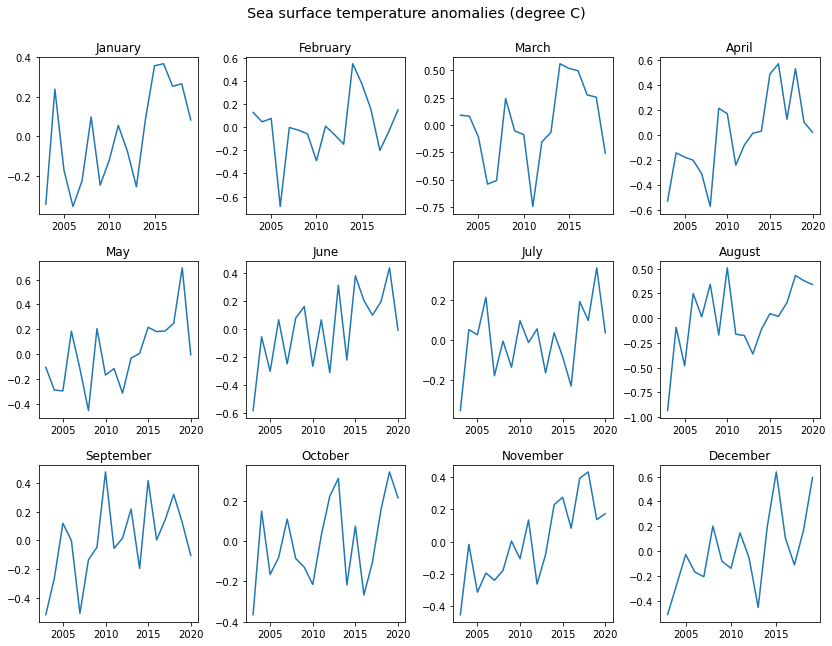

<Figure size 432x288 with 0 Axes>

In [33]:
import datetime
fig = plt.figure(figsize = (14, 10))
fig.suptitle("Sea surface temperature anomalies (degree C)", fontsize = 'x-large')
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.title(datetime.date(1900, i , 1).strftime('%B'))
    A = np.array(f[i - 1])
    a = np.interp(np.arange(len(A)), 
          np.arange(len(A))[np.isnan(A) == False], 
          A[np.isnan(A) == False])
    mea = a[1:].mean()
    plt.plot(range(2003,2003 + len(a[1:])), a[1:]-mea)
#fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
fig.subplots_adjust(top=0.91)
plt.show()
plt.savefig('sst.png')

In [36]:
np.array(range(2002, 2002 + len(a) - 1))

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018])